Stock Price Prediction & Forecasting Using LSTM

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/data/Tesla.csv')
data

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [ ]:
# adjusting the date
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data.set_index('Date', inplace=True)
data.head()
data

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
2010-06-30,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
2010-07-06,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...
2017-03-13,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
2017-03-14,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
2017-03-15,257.000000,261.000000,254.270004,255.729996,4816600,255.729996


In [ ]:
# We only want to look at the closing price
data = data[['Close']]
data

,Close
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001
...,...
2017-03-13,246.169998
2017-03-14,258.000000
2017-03-15,255.729996


In [ ]:
def df_to_X_y(df, window_size=5):
  X = []
  y = []
  for i in range(len(df)-window_size):
    row = [[a] for a in df[i:i+window_size]]
    X.append(row)
    label = df[i+window_size]
    y.append(label)

  return np.array(X), np.array(y)


In [ ]:
X, y = df_to_X_y(data['Close'], window_size=5)
X.shape, y.shape

((1687, 5, 1), (1687,))

In [ ]:
X_train, y_train = X[:1200], y[:1200]
X_val, y_val = X[1200:1300], y[1200:1300]
X_test, y_test = X[1300:], y[1300:]

In [ ]:
# Define the model
from keras.models import Sequential
from keras.layers import LSTM, Dense, InputLayer
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError

model = Sequential()
model.add(InputLayer(input_shape=(5, 1)))
model.add(LSTM(64))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0005), metrics=[RootMeanSquaredError()])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,009 (74.25 KB)

 Trainable params: 19,009 (74.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpoint_path = "model1/model_checkpoint.keras"
# Create a callback that saves the model's weights
cp = ModelCheckpoint(filepath=checkpoint_path, save_best_only=True)


In [ ]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[cp])

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 17311.6309 - root_mean_squared_error: 131.5125 - val_loss: 61289.0391 - val_root_mean_squared_error: 247.5662
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 15593.4150 - root_mean_squared_error: 124.8519 - val_loss: 60411.5781 - val_root_mean_squared_error: 245.7877
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15616.3389 - root_mean_squared_error: 124.8211 - val_loss: 58924.3281 - val_root_mean_squared_error: 242.7433
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15346.2969 - root_mean_squared_error: 123.8587 - val_loss: 56176.6914 - val_root_mean_squared_error: 237.0162
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14234.7754 - root_mean_squared_error: 119.1465 - val_loss: 51150.8164 - val_root_mean_squared_error: 226.1655
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12297.2363 - root_mean_squared_error: 110.8789 - val_loss: 47029.6992 - val_root_mean_squared_e

In [ ]:
from keras.models import load_model
model = load_model(checkpoint_path)

In [ ]:
train_pred = model.predict(X_train).flatten()
train_df = pd.DataFrame({'Actual': y_train, 'Predicted': train_pred})
train_df

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


,Actual,Predicted
0,15.800000,16.464815
1,17.459999,16.321768
2,17.400000,18.087181
3,17.049999,17.952860
4,18.139999,17.420612
...,...,...
1195,203.250000,205.693863
1196,207.669998,204.167114
1197,210.089996,208.086746
1198,210.899994,210.595306


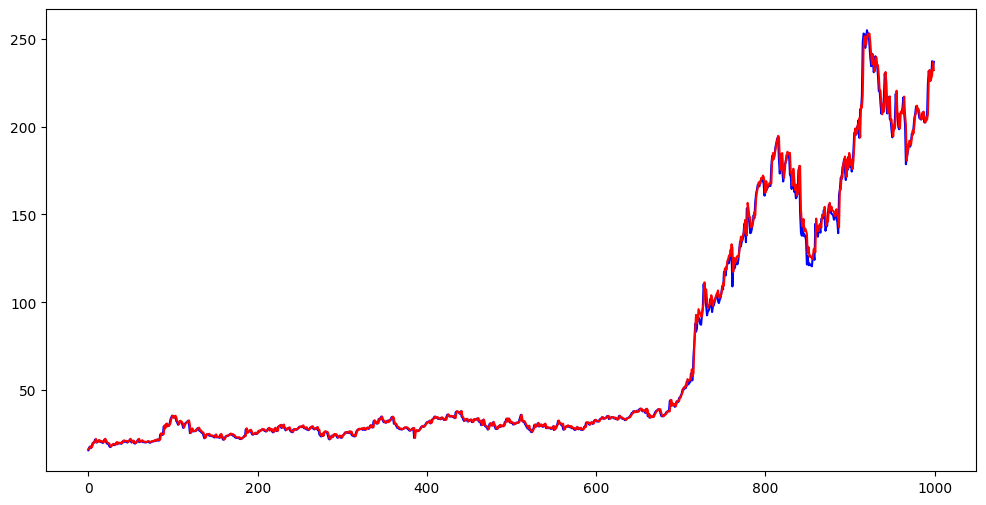

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train_df['Actual'][:1000], label='Actual', color='blue')
plt.plot(train_df['Predicted'][:1000], label='Predicted', color='red')

In [ ]:
test_pred = model.predict(X_test).flatten()
test_df = pd.DataFrame({'Actual': y_test, 'Predicted': test_pred})
test_df

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Actual,Predicted
0,245.570007,247.286209
1,241.929993,245.144669
2,248.169998,242.435059
3,248.910004,247.362122
4,248.479996,248.052109
...,...,...
382,246.169998,243.894684
383,258.000000,245.729691
384,255.729996,254.290802
385,262.049988,254.710495


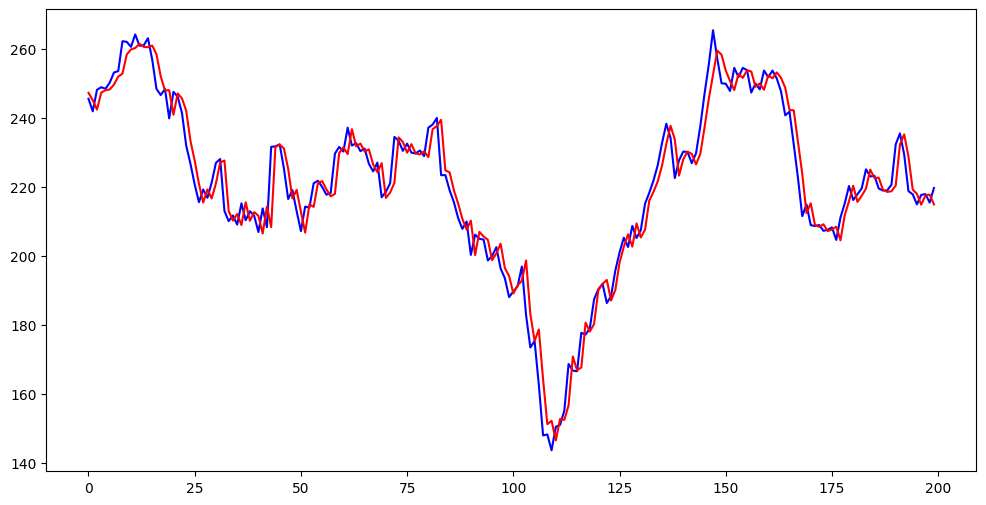

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(test_df['Actual'][:200], label='Actual', color='blue')
plt.plot(test_df['Predicted'][:200], label='Predicted', color='red')